[![Kaggle](https://kaggle.com/static/images/open-in-kaggle.svg)](https://kaggle.com/kernels/welcome?src=https://github.com/pixeltable/pixeltable/blob/release/docs/notebooks/integrations/working-with-together.ipynb)&nbsp;&nbsp;
[![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/pixeltable/pixeltable/blob/release/docs/notebooks/integrations/working-with-together.ipynb)&nbsp;&nbsp;
<a href="https://raw.githubusercontent.com/pixeltable/pixeltable/release/docs/notebooks/integrations/working-with-together.ipynb" download><img src="https://img.shields.io/badge/%E2%AC%87-Download%20Notebook-blue" alt="Download Notebook"></a>

# Working with Together AI in Pixeltable

### Prerequisites
- A Together AI account with an API key (https://api.together.ai/settings/api-keys)

### Important Notes

- Together.ai usage may incur costs based on your Together.ai plan.
- Be mindful of sensitive data and consider security measures when integrating with external services.

First you'll need to install required libraries and enter your Together API key.

In [ ]:
%pip install -qU pixeltable together

In [ ]:
import os
import getpass

if 'TOGETHER_API_KEY' not in os.environ:
    os.environ['TOGETHER_API_KEY'] = getpass.getpass('Together API Key: ')

Now let's create a Pixeltable directory to hold the tables for our demo.

In [1]:
import pixeltable as pxt

# Remove the 'together_demo' directory and its contents, if it exists
pxt.drop_dir('together_demo', force=True)
pxt.create_dir('together_demo')

Connected to Pixeltable database at: postgresql+psycopg://postgres:@/pixeltable?host=/Users/asiegel/.pixeltable/pgdata
Created directory 'together_demo'.


## Chat Completions

Create a Table: In Pixeltable, create a table with columns to represent your input data and the columns where you want to store the results from OpenAI.

In [2]:
from pixeltable.functions import together

chat_t = pxt.create_table('together_demo.chat', {'input': pxt.String})

messages = [{'role': 'user', 'content': chat_t.input}]

chat_t.add_computed_column(output=together.chat_completions(
    messages=messages,
    model='meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo',
    model_kwargs={
        # Optional dict with parameters for the Together API
        'max_tokens': 300,
        'stop': ['\n'],
        'temperature': 0.7,
        'top_p': 0.9,
    }
))
chat_t.add_computed_column(response=chat_t.output.choices[0].message.content)

Created table `chat`.
Added 0 column values with 0 errors.
Added 0 column values with 0 errors.


UpdateStatus(num_rows=0, num_computed_values=0, num_excs=0, updated_cols=[], cols_with_excs=[])

In [3]:
# Start a conversation
chat_t.insert([
    {'input': 'How many species of felids have been classified?'},
    {'input': 'Can you make me a coffee?'}
])
chat_t.select(chat_t.input, chat_t.response).head()

Inserting rows into `chat`: 2 rows [00:00, 221.12 rows/s]
Inserted 2 rows with 0 errors.


input  \
0                         Can you make me a coffee?   
1  How many species of felids have been classified?   

                                            response  
0  I'm not capable of physically making you a cof...  
1  There are approximately 40 species of felids t...

## Embeddings

In [4]:
emb_t = pxt.create_table('together_demo.embeddings', {'input': pxt.String})
emb_t.add_computed_column(embedding=together.embeddings(
    input=emb_t.input,
    model='togethercomputer/m2-bert-80M-32k-retrieval'
))

Created table `embeddings`.
Added 0 column values with 0 errors.


UpdateStatus(num_rows=0, num_computed_values=0, num_excs=0, updated_cols=[], cols_with_excs=[])

In [5]:
emb_t.insert(input='Together AI provides a variety of embeddings models.')

Inserting rows into `embeddings`: 1 rows [00:00, 135.03 rows/s]
Inserted 1 row with 0 errors.


UpdateStatus(num_rows=1, num_computed_values=2, num_excs=0, updated_cols=[], cols_with_excs=[])

In [6]:
emb_t.head()

input  \
0  Together AI provides a variety of embeddings m...   

                                           embedding  
0  [0.016232446, -0.2097417, 0.20096539, 0.153079...

## Image Generations

In [7]:
image_t = pxt.create_table('together_demo.images', {'input': pxt.String})
image_t.add_computed_column(img=together.image_generations(
    image_t.input,
    model='black-forest-labs/FLUX.1-schnell',
    model_kwargs={'steps': 5}
))

Created table `images`.
Added 0 column values with 0 errors.


UpdateStatus(num_rows=0, num_computed_values=0, num_excs=0, updated_cols=[], cols_with_excs=[])

In [8]:
image_t.insert([
    {'input': 'A friendly dinosaur playing tennis in a cornfield'}
])

Inserting rows into `images`: 1 rows [00:00, 204.46 rows/s]
Inserted 1 row with 0 errors.


UpdateStatus(num_rows=1, num_computed_values=2, num_excs=0, updated_cols=[], cols_with_excs=[])

In [9]:
image_t

Table 'together_demo.images'

 Column Name    Type                                      Computed With
       input  String                                                   
         img   Image  image_generations(input, model='black-forest-l...

input  \
0  A friendly dinosaur playing tennis in a cornfield   

                                                 img  
0  <PIL.JpegImagePlugin.JpegImageFile image mode=...
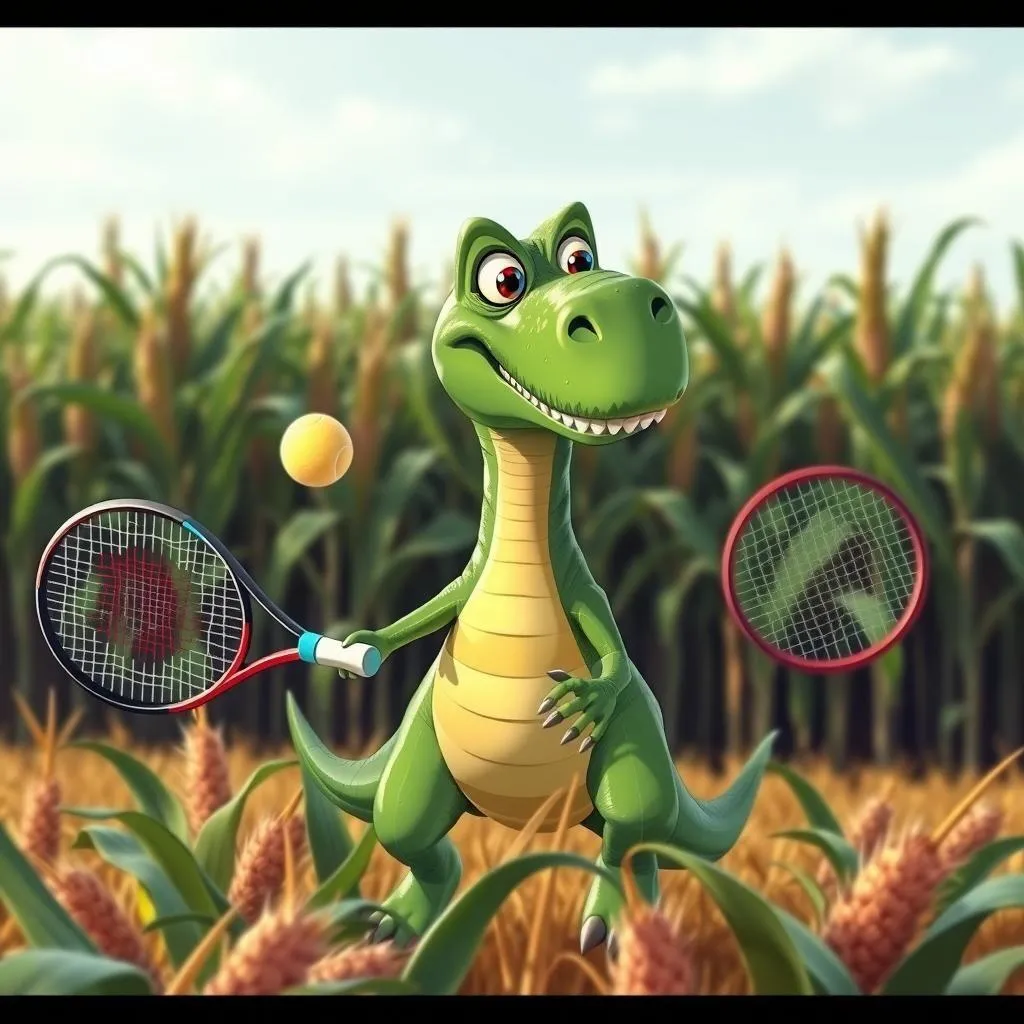

In [10]:
image_t.head()

### Learn More

To learn more about advanced techniques like RAG operations in Pixeltable, check out the [RAG Operations in Pixeltable](https://pixeltable.readme.io/docs/rag-operations-in-pixeltable) tutorial.

You can also look at how to work with images in Pixeltable: [Working with Images](https://pixeltable.readme.io/docs/working-with-images).

If you have any questions, don't hesitate to reach out.